<a href="https://colab.research.google.com/github/Ashusaggu/INFO-5731-SPRING-2024/blob/main/Saggu_Aasreetha_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import pandas as pd

In [2]:
ds=pd.read_csv("cleaned_dataset_final.csv")
ds

Old review  \
0    ...about this product SOONER! Brace yourself, ...   
1    i love this product with my whole heart. it la...   
2    I love the snail mucin … but when you add the ...   
3    when i first got this in the mail, i was a lit...   
4    I’ve been using this serum now for about a yea...   
..                                                 ...   
995  I've had no issues with uneven pumping (see ph...   
996  I love this product! First of all, it's very m...   
997  I really hate leaving reviews that aren’t grea...   
998  I like this product but I have sensitive skin ...   
999  Not sure if I've noticed a difference in my sk...   

                                            New review  
0    product sooner brace lengthi indepth review ra...  
1    love product whole heart last long time make s...  
2    love snail mucin  add niacinamid  chef  kiss  ...  
3    first got mail littl surpris see small size al...  
4     use serum year love skin feel smooth like sil...  
..                                                 ...  
995  ive issu uneven pump see photo keep upright ti...  
996  love product first moistur without heavi greas...  
997  realli hate leav review  great feel  import ho...  
998  like product sensit skin dont know need get us...  
999  sure ive notic differ skin doesnt hydrat skin ...  

[1000 rows x 2 columns]

In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# Write your code here
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd

def get_ngram(token, n):
    return list(ngrams(token, n))

def count_ngram(token, n):
    n_g = get_ngram(token, n)
    return Counter(n_g)

def bigram_probabilities(token):
    bg = get_ngram(token, 2)
    ug = token
    bigram_count = Counter(bg)
    unigram_count = Counter(ug)

    prob = {}

    for b in bigram_count:
        w1, w2 = b
        probability = bigram_count[b] / unigram_count[w1]
        prob[b] = probability

    return prob

def noun_phrase(t):
    # extracting nouns through converting them into tokens and then using pos tags
    token = word_tokenize(t)
    tag_token = nltk.pos_tag(token)

    # grammar rule for extracting noun phrases
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(tag_token)

    noun_ph = []
    for sub in tree.subtrees():
        if sub.label() == 'NP':
            noun_ph.append(' '.join(word for word, tag in sub.leaves()))

    return noun_ph

def relative_probabilities(ds):
    all_nounphrase = []
    review_nounphrase = []

    for r in ds:
        noun_ph= noun_phrase(r)
        review_nounphrase.append(Counter(noun_ph))
        all_nounphrase.extend(noun_ph)

    max_freq = Counter(all_nounphrase)

    relative_prob = []
    for count in review_nounphrase:
        relative_prob.append({
            np: count[np] / max_freq[np] if max_freq[np] != 0 else 0
            for np in count
        })

    return relative_prob



# Reading the dataset from already existing file from assignment 2
with open('cleaned_dataset_final.csv', 'r', encoding='utf-8') as f:
    data= f.readlines()

# Tokenizing the data
tokenized_data = [word_tokenize(rev) for rev in data]

# Counting the frequency of the ngrams
tg_count = count_ngram([tuple(rev) for rev in tokenized_data], 3)
print("Frequencies of trigrams are:")
print(tg_count)

# probability of bigrams
bg_probability = bigram_probabilities([w for rev in tokenized_data for w in rev])
print("\n Probabilities of bigrams are:")
print("\n")
print(bg_probability)
relative_prob = relative_probabilities(data)
df = pd.DataFrame(relative_prob)
# Filling NaN values with 0
df = df.fillna(0)
print("Relative probabilities:")
print(df)





Frequencies of trigrams are:
Counter({(('``', '...', 'about', 'this', 'product', 'SOONER', '!', 'Brace', 'yourself', ',', 'this', 'is', 'a', 'lengthy', ',', 'in-depth', 'review', '.', '*', 'raises', 'hand', '*', 'Hi', ',', 'my', 'name', 'is', 'Ashley', ',', 'and', 'I', 'am', 'a', 'skincare-aholic', '😆', '.', 'I', '’', 'm', '40', 'years', 'old', '.', 'During', 'my', 'youth', '(', '14', 'years', 'old', '-', 'early', '20', '’', 's', ')', ',', 'I', 'consistently', 'had', 'dry', 'skin', 'which', 'now', 'looking', 'back', ',', 'I', 'attribute', 'to', 'my', 'unknowingness', 'of', 'proper', 'skincare', 'products', '👀', 'circa', '90', '’', 's', 'Sea', 'Breeze', 'and', 'Oxy', 'Pads', 'I', '’', 'm', 'looking', 'at', 'you', '👀', 'and', 'routine', '.', 'At', 'approximately', '25', 'years', 'old', 'to', 'present', ',', 'I', 'began', 'having', 'combination', 'skin', 'that', 'is', 'slightly', 'dry', 'around', 'my', 'mouth', 'and', 'chin', 'and', 'my', 'T-zone', 'mildly', 'oily', '.', 'Within', 'the', 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [5]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
doc = pd.read_csv('cleaned_dataset_final.csv')
docu = doc['New review']
# query
query = "love snail mucin  add niacinamid  chef  kiss   leav skin perfect makeup prep  love way skin feel look"
#to calculate the tf-idf matrix we are combining the reviews with the query
all_text=pd.concat([docu, pd.Series([query])], ignore_index=True)
#Building the TF-IDF matrix
vec = TfidfVectorizer()
tfidf = vec.fit_transform(all_text)
#calculating the cosine similiarity for the matrix
cos = cosine_similarity(tfidf[-1], tfidf[:-1])
#Ranking the documents based on the similarity score from the above line of code
score = list(enumerate(cos[0]))
sorted_ = sorted(score, key=lambda x: x[1], reverse=True)

#Printing the matrix
print("Terms\t", "\t".join(["Document No:" + str(i + 1) for i in range(len(docu))] + ["Query"]))
term = vec.get_feature_names_out()
for i in range(len(term)):
    print(term[i], end="\t")
    for j in range(len(all_text)):
        print(f"{tfidf[j, i]:.4f}", end="\t")
    print()

#Print the ranked documents
print("\nGiven Query is:", query)
print("\nDocuments based on rank :")
for idx, sc in sorted_:
    print(f"Document No: {idx + 1}: Similarity Score = {sc:.4f}")
    print(f"   {docu[idx]}")
    print()





Terms	 Document No:1	Document No:2	Document No:3	Document No:4	Document No:5	Document No:6	Document No:7	Document No:8	Document No:9	Document No:10	Document No:11	Document No:12	Document No:13	Document No:14	Document No:15	Document No:16	Document No:17	Document No:18	Document No:19	Document No:20	Document No:21	Document No:22	Document No:23	Document No:24	Document No:25	Document No:26	Document No:27	Document No:28	Document No:29	Document No:30	Document No:31	Document No:32	Document No:33	Document No:34	Document No:35	Document No:36	Document No:37	Document No:38	Document No:39	Document No:40	Document No:41	Document No:42	Document No:43	Document No:44	Document No:45	Document No:46	Document No:47	Document No:48	Document No:49	Document No:50	Document No:51	Document No:52	Document No:53	Document No:54	Document No:55	Document No:56	Document No:57	Document No:58	Document No:59	Document No:60	Document No:61	Document No:62	Document No:63	Document No:64	Document No:65	Document No:66	Document No:

In [6]:
print(docu.isnull().sum())
print(pd.isna(query))

0
False


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

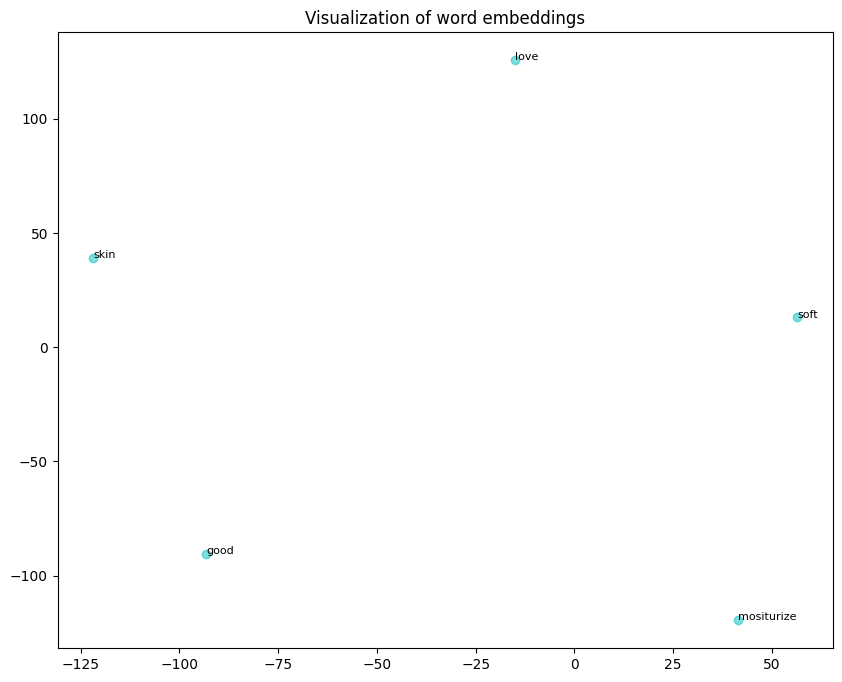

In [7]:
# Write your code here

import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('cleaned_dataset_final.csv')

# iterating over the column new-review
corpus = [str(rev).split() for rev in df['New review']]
#word2vec model training
vec_model = Word2Vec(sentences=corpus, vector_size=300, window=5, min_count=1, workers=4)
vec_model.save("vec_model.bin")
#by using t-SNE we are visualizing the word embeddings
def visualize(vec_model, word):
    vec = np.array([vec_model.wv[w] for w in word if w in vec_model.wv])
#perplexity should be less thn the number of samples
    per = min(5, len(vec)-1)
    tsne_val = TSNE(n_components=2, random_state=42, perplexity=per)
    tnse_vec= tsne_val.fit_transform(vec)

    plt.figure(figsize=(10,8))
    plt.scatter(tnse_vec[:, 0], tnse_vec[:, 1], marker='o', color='c', alpha=0.5)

    for i, w in enumerate(word):
        if i < len(tnse_vec):
            plt.annotate(w, xy=(tnse_vec[i, 0], tnse_vec[i, 1]), fontsize=8)

    plt.title("Visualization of word embeddings")
    plt.show()

#words we want to visualize
v_words = ["love","skin","mositurize","good","soft","like","hydrat"]

# Visualizing the word embeddings
visualize(vec_model,v_words)





## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


# The GitHub link of your final csv file


# Link: https://github.com/Ashusaggu/INFO-5731-SPRING-2024/blob/main/annotated_reviews.csv



In [8]:
# The GitHub link of your final csv file


# Link: https://github.com/Ashusaggu/INFO-5731-SPRING-2024/blob/main/annotated_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

I enjoyed writing code from stratch instead of writing it from the pre-existing libraries, it felt new and helped me in revising the topics again. I felt this assignment was ok interms of difficulty and i think the time given was enough to complete the assignment.